In [3]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential

https://towardsdatascience.com/implementing-an-autoencoder-in-tensorflow-2-0-5e86126e9f7

In [6]:
def data_generator(batch_size = 4):
    
    files = os.listdir('images/Unruled/')
    while True:
        X = []
        y = []
        for f in np.random.choice(files, batch_size):
            target = np.array(Image.open(os.path.join('images/Unruled',f)))
            lines = target*0
            spacing = np.random.randint(25,50)
            offset = np.random.randint(0,spacing)
            
            lines[offset::spacing] = 1
            
            slant = np.random.uniform(-.1,.1)
            for i in range(lines.shape[1]):
                lines[:,i] = np.roll(lines[:,i], int(i*slant))
                
            gray_value = np.random.randint(40,120)
            
            lined_image = ((1-lines)*target) + (lines*gray_value)
            
            lined_image = lined_image.reshape(*lined_image.shape, 1)
            
            target = target.reshape(*target.shape, 1)
            
            y.append(target)
            X.append(lined_image)
            
        yield np.array(X), np.array(y)
        

In [7]:
X, y = next(data_generator())
X.shape, y.shape

((4, 500, 400, 1), (4, 500, 400, 1))

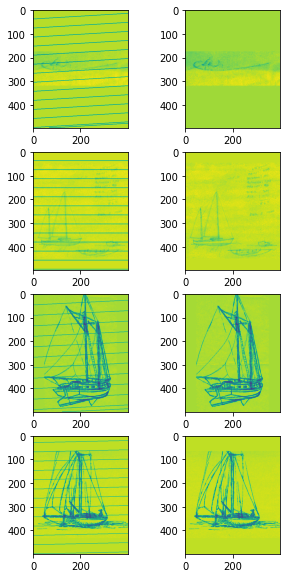

In [8]:
X, y = next(data_generator())

fig, axs = plt.subplots(4, 2, figsize=(5,10))

for ax, XX in zip(axs[:,0].flatten(), X.reshape(-1,500,400)):
    ax.imshow(XX)
    
for ax, yy in zip(axs[:,1].flatten(), y.reshape(-1,500,400)):
    ax.imshow(yy)

In [9]:
model = Sequential()
model.add(Input((500,400,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
# model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(Dense(128))
# model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 1, kernel_size=(3,3), activation='linear', padding='same'))
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 398, 32)      320       
_________________________________________________________________
dense (Dense)                (None, 498, 398, 128)     4224      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 500, 400, 32)      36896     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 500, 400, 1)       289       
Total params: 41,729
Trainable params: 41,729
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(data_generator(2), epochs = 200, steps_per_epoch = 10)

Epoch 1/200
10/10 [==============================] - 1s 109ms/step - loss: 28.4700
Epoch 2/200
10/10 [==============================] - 1s 105ms/step - loss: 35.6118
Epoch 3/200
10/10 [==============================] - 1s 106ms/step - loss: 31.4093
Epoch 4/200
10/10 [==============================] - 1s 105ms/step - loss: 28.1105
Epoch 5/200
10/10 [==============================] - 1s 105ms/step - loss: 41.8295
Epoch 6/200
10/10 [==============================] - 1s 106ms/step - loss: 26.5072
Epoch 7/200
10/10 [==============================] - 1s 107ms/step - loss: 254.3757
Epoch 8/200
10/10 [==============================] - 1s 105ms/step - loss: 172.9553
Epoch 9/200
10/10 [==============================] - 1s 104ms/step - loss: 106.9780
Epoch 10/200
10/10 [==============================] - 1s 107ms/step - loss: 71.0035
Epoch 11/200
10/10 [==============================] - 1s 107ms/step - loss: 31.1490
Epoch 12/200
10/10 [==============================] - 1s 105ms/step - loss: 32.982

10/10 [==============================] - 1s 104ms/step - loss: 47.6756
Epoch 192/200
10/10 [==============================] - 1s 104ms/step - loss: 44.7700
Epoch 193/200
10/10 [==============================] - 1s 104ms/step - loss: 17.2580
Epoch 194/200
10/10 [==============================] - 1s 103ms/step - loss: 28.2077
Epoch 195/200
10/10 [==============================] - 1s 104ms/step - loss: 17.6157
Epoch 196/200
10/10 [==============================] - 1s 104ms/step - loss: 27.2055
Epoch 197/200
10/10 [==============================] - 1s 105ms/step - loss: 18.4267
Epoch 198/200
10/10 [==============================] - 1s 104ms/step - loss: 22.9398
Epoch 199/200
10/10 [==============================] - 1s 104ms/step - loss: 23.7208
Epoch 200/200
10/10 [==============================] - 1s 107ms/step - loss: 24.6185


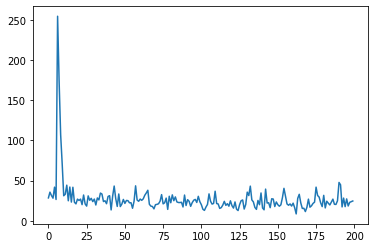

In [39]:
plt.plot(history.history.get('loss'))

In [40]:
X ,y = next(data_generator())
result = model.predict(X)
result[result>255] = 255
result[result<0] = 0

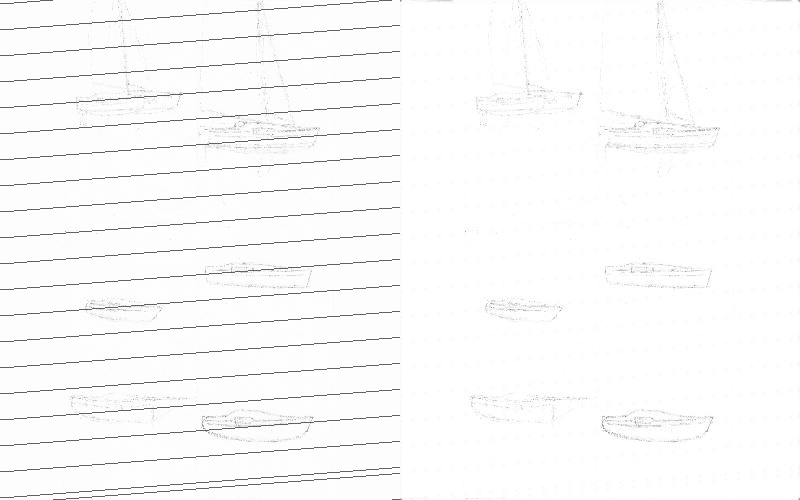

In [41]:
a = X[0,:,:,:].astype(np.uint8).reshape(500,400)
b = result[0,:,:,:].astype(np.uint8).reshape(500,400)

Image.fromarray(np.hstack([a,b]))

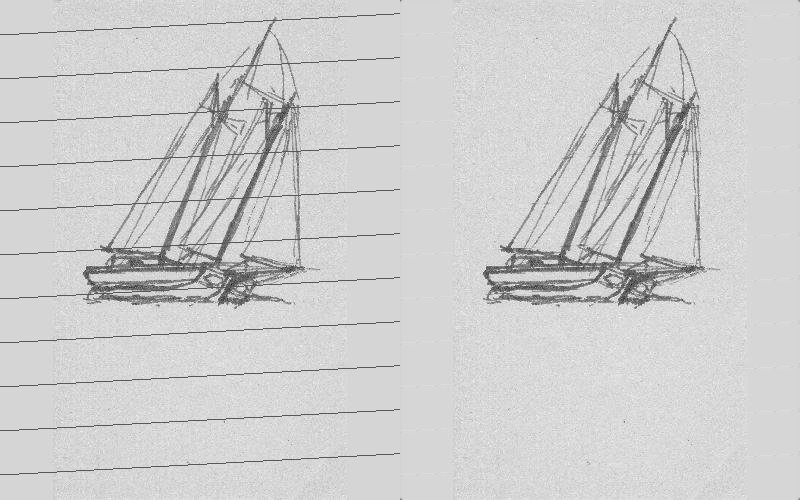

In [42]:
a = X[1,:,:,:].astype(np.uint8).reshape(500,400)
b = result[1,:,:,:].astype(np.uint8).reshape(500,400)

Image.fromarray(np.hstack([a,b]))

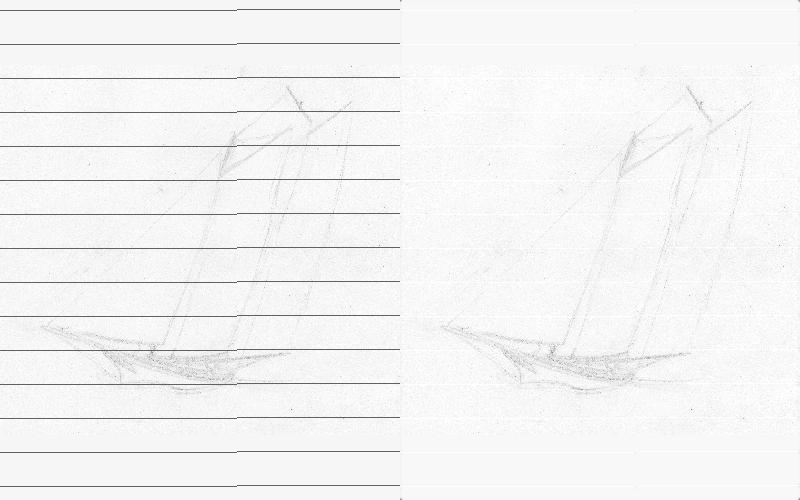

In [43]:
a = X[2,:,:,:].astype(np.uint8).reshape(500,400)
b = result[2,:,:,:].astype(np.uint8).reshape(500,400)

Image.fromarray(np.hstack([a,b]))

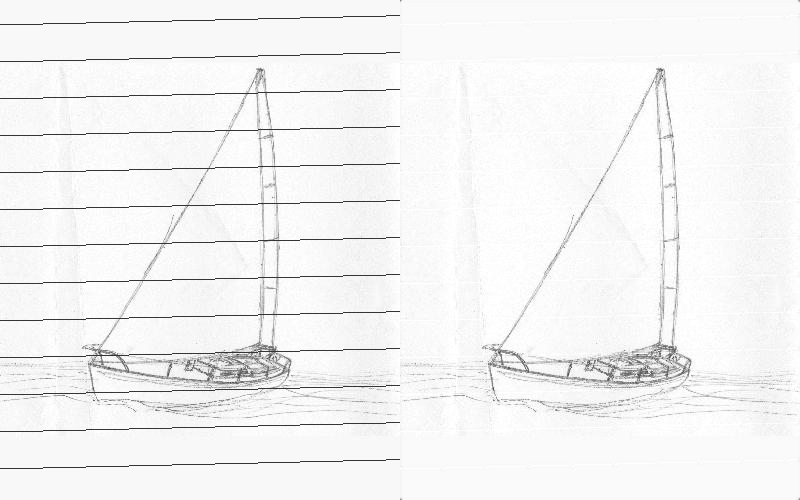

In [44]:
a = X[3,:,:,:].astype(np.uint8).reshape(500,400)
b = result[3,:,:,:].astype(np.uint8).reshape(500,400)

Image.fromarray(np.hstack([a,b]))

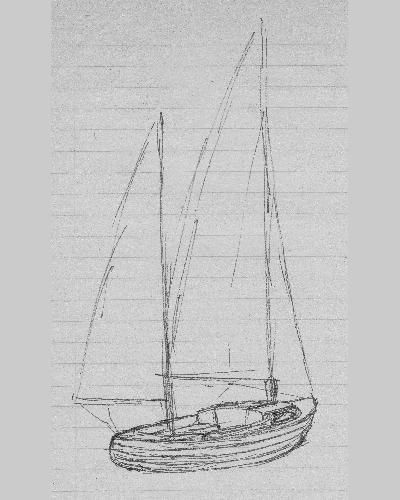

In [48]:
new_image = np.array(Image.open(os.path.join('images/Ruled','IMG_0017.jpg')))
cleaned_image = model.predict(new_image.reshape(1,*new_image.shape,1))
Image.fromarray(new_image)

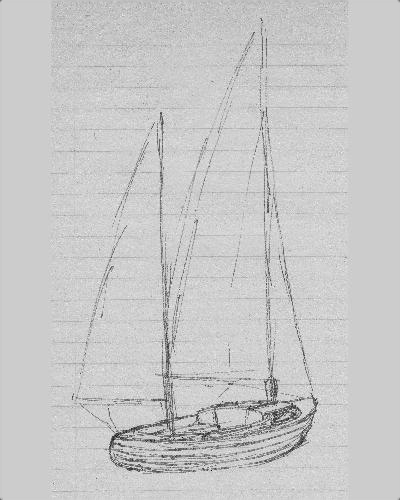

In [49]:
Image.fromarray(cleaned_image.reshape(new_image.shape).astype(np.uint8))

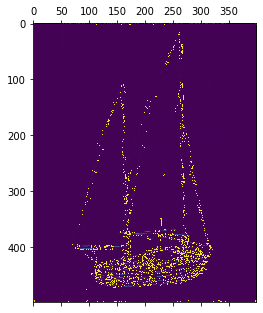

In [56]:
plt.matshow(((cleaned_image.reshape(new_image.shape) - new_image).astype(np.uint8)))
# result[result<0] = 0
# result[result>255] = 255
# Image.fromarray(result)